In [6]:
!pip install liac-arff

In [7]:
import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import arff
import pandas as pd

with open('/content/drive/My Drive/agh/titanic.arff', 'r') as f:
    dataset = arff.load(f)

columns = [attr[0] for attr in dataset['attributes']]
data = pd.DataFrame(dataset['data'], columns=columns)

In [10]:
# Pierwsze 20 rekordow
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


In [11]:
print("Laczna liczba wierszy danych")
print(len(data))

# Sumaryczna liczba brakujących wartości w każdej kolumnie
missing_sum = data.isnull().sum()
print("\nLiczba brakujących wartości w poszczególnych kolumnach:")
print(missing_sum)

# Procentowy udział brakujących wartości
missing_percent = data.isnull().mean() * 100
print("\nProcent brakujących wartości w poszczególnych kolumnach:")
print(missing_percent)

Laczna liczba wierszy danych
1309

Liczba brakujących wartości w poszczególnych kolumnach:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Procent brakujących wartości w poszczególnych kolumnach:
pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


In [12]:
# Utworzenie binarnej zmiennej dla brakujących wartości w kolumnie 'age'
def display_grouped_missing_ratio(column_to_check, group_by_column, withPrint = False):
    missing_col = f"{column_to_check}_missing"

    missing_ratio = (
        data.assign(**{missing_col: data[column_to_check].isnull().astype(int)})
            .groupby(group_by_column)[missing_col]
            .mean()
    )

    if withPrint:
      print(f"Średnia wartość {missing_col} dla każdej wartości w kolumnie: {group_by_column}\n")
      print(missing_ratio)
      print("\n\n")

    return missing_ratio



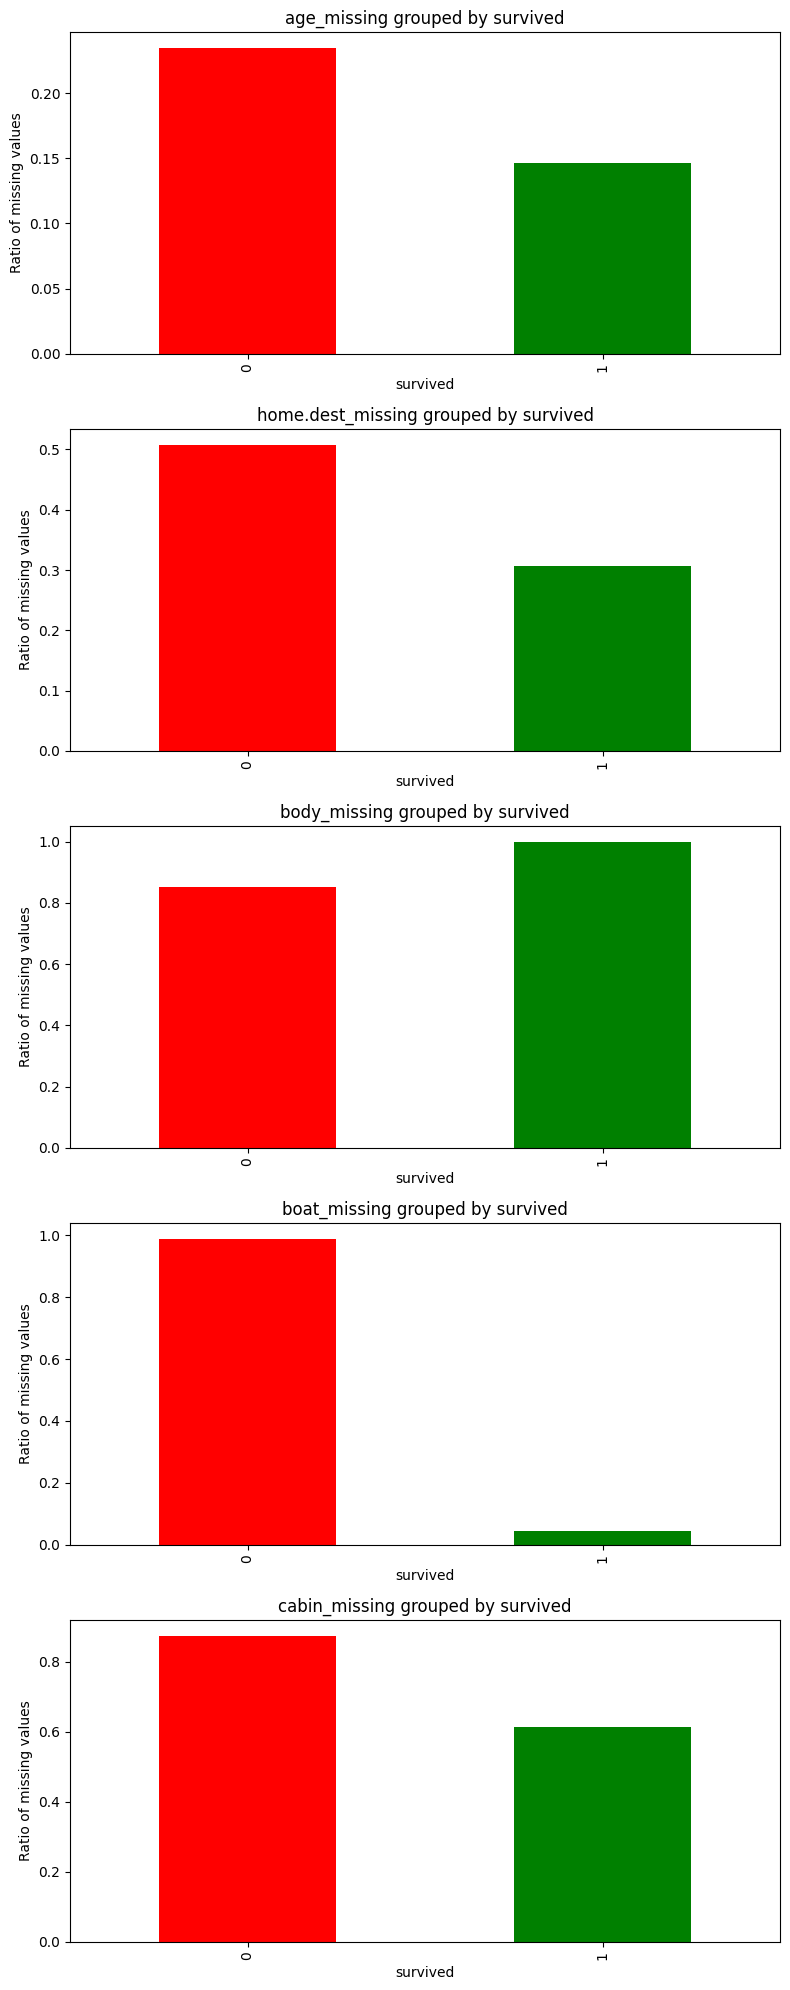

In [13]:
results = {}
results["age"] = display_grouped_missing_ratio("age", "survived")
results["home.dest"] = display_grouped_missing_ratio("home.dest", "survived")
results["body"] = display_grouped_missing_ratio("body", "survived")
results["boat"] = display_grouped_missing_ratio("boat", "survived")
results["cabin"] = display_grouped_missing_ratio("cabin", "survived")

fig, axs = plt.subplots(5, 1, figsize=(8, 20))

for ax, (col, series) in zip(axs, results.items()):
    colors = ['red' if int(idx) == 0 else 'green' for idx in series.index]
    series.plot(kind="bar", ax=ax, color = colors)
    ax.set_title(f"{col}_missing grouped by survived")
    ax.set_ylabel("Ratio of missing values")
    ax.set_xlabel("survived")

plt.tight_layout()
plt.show()

---
# Zajecia 2
---

In [18]:
# 1. Sprawdź liczebność poszczególnych etykiet dla danych zmiennych jakościowych
# 3. Skomentuj wyniki otrzymane w punkcie 1 i 2. Podziel zmienne ze względu na dużą i małą moc zbioru (kardynalność).
# 4. Sprawdź, ile unikalnych etykiet ma zmienna mówiąca o kabinie danego pasażera. Użyj takiej funkcji, która zwraca wynik w postaci NumPy array.

def print_unique_values(data):
  unique_counts = {col: data[col].nunique() for col in data.columns}

  sorted_counts = dict(reversed(sorted(unique_counts.items(), key=lambda item: item[1])))

  for column, count in sorted_counts.items():
      print(f"{column}: {count} unikalnych wartości")


print_unique_values(data)

name: 1307 unikalnych wartości
ticket: 929 unikalnych wartości
home.dest: 369 unikalnych wartości
fare: 281 unikalnych wartości
cabin: 186 unikalnych wartości
body: 121 unikalnych wartości
age: 98 unikalnych wartości
boat: 27 unikalnych wartości
parch: 8 unikalnych wartości
sibsp: 7 unikalnych wartości
embarked: 3 unikalnych wartości
pclass: 3 unikalnych wartości
sex: 2 unikalnych wartości
survived: 2 unikalnych wartości


In [15]:
# 2. Wyświetl z użyciem funkcji print liczbę wszystkich pasażerów. Wykorzystaj podobny sposób jak w ptk 1.

print(f"Liczba wszystkich pasażerów: {len(data)}")

Liczba wszystkich pasażerów: 1309


In [16]:
# 5. Zredukuj liczbę cech dla zmiennej opisującej kabiny poprzez zastąpienie obecnych etykiet w formacie LL11 do etykiet zawierających tylko pierwszą literę. Użyj astype(str).str[pozycja]. Nową zmienną nazwij CabinReduced. Wyświetl pierwsze 20 wierszy zbioru danych dla kolumn Cabin i CabinReduced

altered_data = data.copy()

altered_data["CabinReduced"] = altered_data["cabin"].astype(str).str[0]

print_unique_values(altered_data)

print("---")

altered_data.head(20)

name: 1307 unikalnych wartości
ticket: 929 unikalnych wartości
home.dest: 369 unikalnych wartości
fare: 281 unikalnych wartości
cabin: 186 unikalnych wartości
body: 121 unikalnych wartości
age: 98 unikalnych wartości
boat: 27 unikalnych wartości
CabinReduced: 9 unikalnych wartości
parch: 8 unikalnych wartości
sibsp: 7 unikalnych wartości
embarked: 3 unikalnych wartości
pclass: 3 unikalnych wartości
sex: 2 unikalnych wartości
survived: 2 unikalnych wartości
---


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,CabinReduced
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",C
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",C
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",C
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",E
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",D
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI",A
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",C
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay",N


In [17]:
# 6. Wyświetl (jak w pkt 1) liczbę etykiet dla zmiennych z ptk 5. O ile procent zredukowano kardynalność zbioru zmiennej opisującej kabiny?

unique_cabin = data['cabin'].nunique()
unique_cabin_reduced = altered_data['CabinReduced'].nunique()

print(f"Liczba unikalnych etykiet w 'cabin': {unique_cabin}")
print(f"Liczba unikalnych etykiet w 'CabinReduced': {unique_cabin_reduced}")

reduction_percentage = 100 * (unique_cabin - unique_cabin_reduced) / unique_cabin
print(f"O ile procent zredukowano kardynalność zmiennej opisującej kabiny: {reduction_percentage:.2f}%")

Liczba unikalnych etykiet w 'cabin': 186
Liczba unikalnych etykiet w 'CabinReduced': 9
O ile procent zredukowano kardynalność zmiennej opisującej kabiny: 95.16%
